In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, "/notebooks/")
from fastai.imports import *

In [2]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "/notebooks/data/celeb/"
IMG_PATH = "/notebooks/data/celeb/img_align_celeba/"
sz=224

In [4]:
files = os.listdir(f'{IMG_PATH}')[:5]

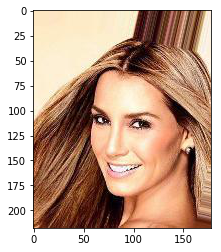

In [5]:
img = plt.imread(f'{IMG_PATH}{files[0]}')
plt.imshow(img);

In [6]:
img.shape

(218, 178, 3)

In [7]:
from courses.dl1.planet import f2

In [8]:
metrics=[f2]
f_model = resnet34

In [9]:
short_label_csv = f'/notebooks/notebook/projects/celeb/short_final.csv'

In [10]:
label_csv = f'/notebooks/notebook/projects/celeb/final.csv'

In [11]:
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [12]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_basic, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'img_align_celeba', label_csv, tfms=tfms, val_idxs=val_idxs)

In [13]:
data = get_data(224)

In [14]:
x,y = next(iter(data.val_dl))

In [15]:
y


    0     1     1  ...      0     0     1
    1     0     1  ...      0     0     1
    0     0     0  ...      0     0     1
       ...          ⋱          ...       
    0     0     1  ...      1     0     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.cuda.FloatTensor of size 64x40 (GPU 0)]

In [16]:
list(zip(data.classes, y[0]))

[('5_o_Clock_Shadow', 0.0),
 ('Arched_Eyebrows', 1.0),
 ('Attractive', 1.0),
 ('Bags_Under_Eyes', 0.0),
 ('Bald', 0.0),
 ('Bangs', 0.0),
 ('Big_Lips', 1.0),
 ('Big_Nose', 0.0),
 ('Black_Hair', 0.0),
 ('Blond_Hair', 0.0),
 ('Blurry', 0.0),
 ('Brown_Hair', 0.0),
 ('Bushy_Eyebrows', 0.0),
 ('Chubby', 0.0),
 ('Double_Chin', 0.0),
 ('Eyeglasses', 0.0),
 ('Goatee', 0.0),
 ('Gray_Hair', 0.0),
 ('Heavy_Makeup', 1.0),
 ('High_Cheekbones', 0.0),
 ('Male', 0.0),
 ('Mouth_Slightly_Open', 0.0),
 ('Mustache', 0.0),
 ('Narrow_Eyes', 1.0),
 ('No_Beard', 1.0),
 ('Oval_Face', 0.0),
 ('Pale_Skin', 0.0),
 ('Pointy_Nose', 1.0),
 ('Receding_Hairline', 0.0),
 ('Rosy_Cheeks', 0.0),
 ('Sideburns', 0.0),
 ('Smiling', 0.0),
 ('Straight_Hair', 0.0),
 ('Wavy_Hair', 0.0),
 ('Wearing_Earrings', 0.0),
 ('Wearing_Hat', 0.0),
 ('Wearing_Lipstick', 1.0),
 ('Wearing_Necklace', 0.0),
 ('Wearing_Necktie', 0.0),
 ('Young', 1.0)]

In [17]:
data.classes

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


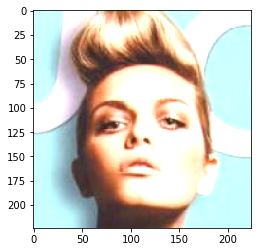

In [18]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [48]:
sz=64

In [49]:
data = get_data(sz)

In [21]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

In [51]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   f2         
    0      0.409076   0.415554   0.656816  



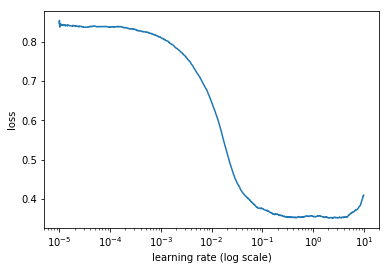

In [52]:
learn.sched.plot(n_skip=0, n_skip_end=0)

In [25]:
lr = 0.2

In [54]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.331411   0.316202   0.742106  
    1      0.327819   0.31125    0.747129  
    2      0.323651   0.309104   0.749313  
    3      0.324573   0.308207   0.750413  
    4      0.32439    0.306245   0.752362  
    5      0.320071   0.305152   0.753187  
    6      0.320622   0.304719   0.753114  



[array([0.30472]), 0.7531143895941673]

In [55]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.318925   0.304916   0.753241  
    1      0.320781   0.304688   0.753653  
    2      0.319464   0.303438   0.754131  
    3      0.319838   0.303548   0.754316  
    4      0.317673   0.302998   0.75456   
    5      0.317751   0.30206    0.755735  
    6      0.317188   0.302136   0.756084  



[array([0.30214]), 0.7560837462346937]

In [26]:
lrs = np.array([lr/9,lr/3,lr])

In [57]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.244255   0.229321   0.811754  
    1      0.230992   0.217952   0.821224  
    2      0.222922   0.212981   0.825742  
    3      0.225469   0.213234   0.825337  
    4      0.218111   0.209088   0.828937  
    5      0.213188   0.204929   0.831819  
    6      0.211155   0.203239   0.833967  



[array([0.20324]), 0.8339665265299051]

In [58]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.213108   0.203188   0.834182  
    1      0.215181   0.204852   0.8329    
    2      0.207976   0.200854   0.836301  
    3      0.213112   0.204701   0.832993  
    4      0.208204   0.203266   0.833926  
    5      0.202393   0.199167   0.837659  
    6      0.199296   0.198374   0.838321  



[array([0.19837]), 0.838321499065588]

In [59]:
learn.save(f'first_{sz}')

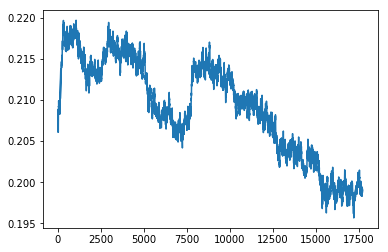

In [60]:
learn.sched.plot_loss()

In [61]:
sz=128

In [62]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.283343   0.264829   0.786585  
    1      0.274406   0.254929   0.7943    
    2      0.270371   0.253528   0.795587  
    3      0.269128   0.251031   0.79763   
    4      0.266771   0.248709   0.79971   
    5      0.263619   0.24836    0.799734  
    6      0.267117   0.247506   0.800521  



[array([0.24751]), 0.800520774670525]

In [63]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'first_{sz}')

epoch      trn_loss   val_loss   f2         
    0      0.207969   0.193914   0.842538  
    1      0.201617   0.190783   0.845629  
    2      0.197545   0.186412   0.848527  
    3      0.19868    0.187971   0.847285  
    4      0.192685   0.185016   0.849695  
    5      0.189451   0.182485   0.851898  
    6      0.186224   0.182147   0.852036  



In [64]:
sz=224

In [65]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.22876    0.215186   0.825832  
    1      0.226662   0.211413   0.828591  
    2      0.222362   0.21066    0.829499  
    3      0.221868   0.209592   0.830119  
    4      0.222235   0.208461   0.83143   
    5      0.22029    0.208229   0.831851  
    6      0.220211   0.207855   0.831897  



[array([0.20786]), 0.8318970539862237]

In [19]:
learn.save(f'first_{sz}')

NameError: name 'learn' is not defined